# **Overview**
https://www.kaggle.com/competitions/cs6271-2022-final-project/overview

In [1]:
!pip install deap==1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# Use the below code to download grape folder to drive if not available 

'''
# Get the library from our BDS research Group
# copy the path from your drive
PATH = '/content/drive/MyDrive/grape/'

# check if 'grape' already exists
if os.path.exists(PATH):
    print('grape directory already exists')
else:
    %cd /content/drive/MyDrive/
    !git clone https://github.com/UL-BDS/grape.git 
    print('Cloning grape in your Drive')
'''

"\n# Get the library from our BDS research Group\n# copy the path from your drive\nPATH = '/content/drive/MyDrive/grape/'\n\n# check if 'grape' already exists\nif os.path.exists(PATH):\n    print('grape directory already exists')\nelse:\n    %cd /content/drive/MyDrive/\n    !git clone https://github.com/UL-BDS/grape.git \n    print('Cloning grape in your Drive')\n"

In [4]:
import os

# change directory to 'grape'
%cd /content/drive/MyDrive/grape/

/content/drive/MyDrive/grape


In [5]:
# Importing libraries

import os
import csv
import random
from os import path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# GE libraries
import grape
import algorithms
from deap import creator, base, tools
from functions import add, sub, mul, pdiv, neg, and_, or_, not_, nand_, nor_,neg, psqrt, less_than_or_equal, greater_than_or_equal, psin, pcos

In [6]:
# Suppressing warnings

import warnings
warnings.filterwarnings("ignore")

In [7]:
# Importing training dataset

data = pd.read_csv('datasets/spaceshipTitanic_train.csv')
data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,Earth,False,55 Cancri e,22,False,0,833,381,0,12,Miranda Pratt,True
1,1,Mars,True,TRAPPIST-1e,61,False,0,0,0,0,0,Isaac Werner,True
2,2,Mars,True,TRAPPIST-1e,5,False,0,0,0,0,0,Elisha Rosario,True
3,3,Earth,False,55 Cancri e,14,False,653,0,4,0,0,Deshawn Hall,False
4,4,Earth,False,PSO J318.5-22,2,False,0,0,0,0,0,Justice Archer,True


In [8]:
# Importing test dataset

test_data = pd.read_csv('datasets/spaceshipTitanic_test.csv')
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,2000,Mars,False,TRAPPIST-1e,54,False,676,0,231,379,0,Dawson Knox
1,2001,Mars,False,TRAPPIST-1e,43,False,336,11,796,15,0,Jaylee Navarro
2,2002,Europa,False,55 Cancri e,33,False,77,2381,0,3656,150,Dario Hart
3,2003,Earth,True,55 Cancri e,30,False,0,0,0,0,0,Alden Parker
4,2004,Europa,False,TRAPPIST-1e,31,False,0,53,0,2963,1017,Gina Frank


# **Data preprocessing**

In [9]:
# Checking training data has NaN values and null values

print('Is NaN count for all columns:\n', data.isna().sum())
print('\n Is Null count for all columns\n', data.isnull().sum())

Is NaN count for all columns:
 PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

 Is Null count for all columns
 PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64


In [10]:
# Checking test data has NaN values and null values

print('Is NaN count for all columns:\n', test_data.isna().sum())
print('\n Is Null count for all columns\n', test_data.isnull().sum())

Is NaN count for all columns:
 PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

 Is Null count for all columns
 PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64


In [11]:
# Drop the 'PassengerId' and 'Name' feature that does not really give much insight from train and test dataset

data_preprocessing = data.drop(['PassengerId', 'Name'], axis=1)
test_data_preprocessing = test_data.drop(['PassengerId', 'Name'], axis=1)

In [12]:
# Standardize the numerical features for train and test data

# Creating list of all the numerical features to standardize
numericals_list = ['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Iterating through all the columns to standardize
for column in numericals_list:
    std_scaler = StandardScaler(with_mean=True, with_std=True)
    std_scaler.fit(data_preprocessing[column].values.reshape(-1,1))
    data_preprocessing[column] = std_scaler.transform(data_preprocessing[column].values.reshape(-1,1))
    test_data_preprocessing[column] = std_scaler.transform(test_data_preprocessing[column].values.reshape(-1,1))

In [13]:
# Encoding categorical features for train and test data

# Creating list of all the categorical features to encode
categorical_classes_list = ['CryoSleep', 'VIP', 'Transported']

# Iterating through all the columns to encode different category
for column in categorical_classes_list:
    label_encoder = LabelEncoder()
    label_encoder.fit(data_preprocessing[column])
    data_preprocessing[column] = label_encoder.transform(data_preprocessing[column])
    if column != 'Transported':
      test_data_preprocessing[column] = label_encoder.transform(test_data_preprocessing[column])

In [14]:
# Apply One hot encoding to categorical features for train and test data

data_preprocessing = pd.get_dummies(data_preprocessing, columns=['HomePlanet','Destination'])
test_data_preprocessing = pd.get_dummies(test_data_preprocessing, columns=['HomePlanet','Destination'])

In [15]:
data_preprocessing.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,-0.448225,0,-0.346747,0.190092,0.421566,-0.276866,-0.251965,1,1,0,0,1,0,0
1,1,2.218358,0,-0.346747,-0.282447,-0.326312,-0.276866,-0.263720,1,0,0,1,0,0,1
2,1,-1.610582,0,-0.346747,-0.282447,-0.326312,-0.276866,-0.263720,1,0,0,1,0,0,1
3,0,-0.995217,0,0.713992,-0.282447,-0.318461,-0.276866,-0.263720,0,1,0,0,1,0,0
4,0,-1.815704,0,-0.346747,-0.282447,-0.326312,-0.276866,-0.263720,1,1,0,0,0,1,0


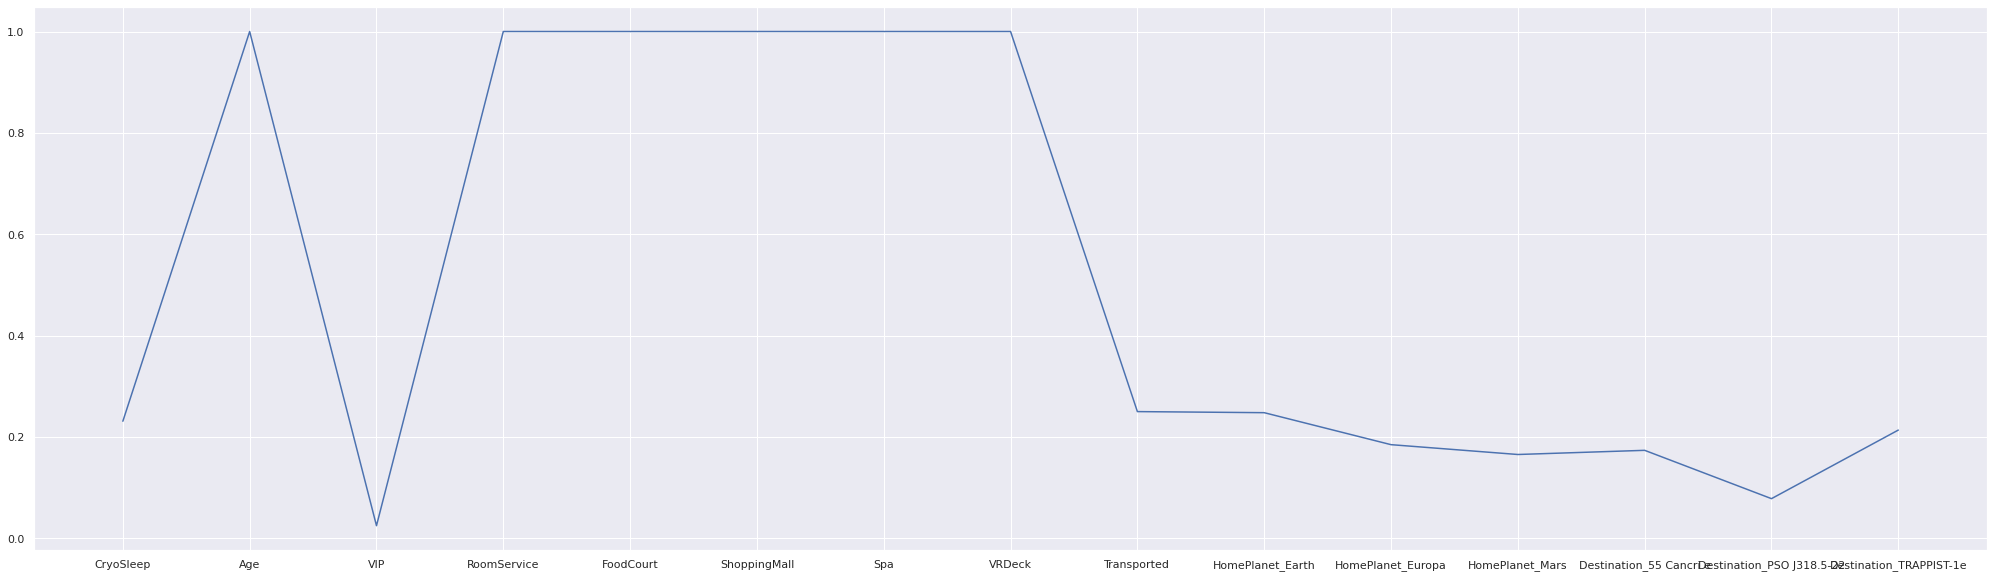

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the variances for Min-Max scaled data
variances = np.var(a=data_preprocessing, axis=0)


sns.set(rc={'figure.figsize':(35, 10)})
# Plotting the graph: variances for each feature
plt.plot(variances)
plt.show()

In [17]:
# data_preprocessing.drop(['VIP', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'], axis=1, inplace=True)
# data_preprocessing.shape

(2000, 8)

In [15]:
processed_data = data_preprocessing.copy()
X = processed_data.drop(['Transported'], axis=1).values
y = processed_data['Transported'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Seperating features and labels for train and test data

# processed_data = data_preprocessing.copy()
# processed_test_data = test_data_preprocessing.copy()

# X_train = processed_data.drop(['Transported'], axis=1).values
# y_train = processed_data['Transported'].values
# X_test = processed_test_data.values

In [20]:
processed_data.head()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,-0.448225,-0.346747,0.190092,0.421566,-0.276866,-0.251965,1
1,1,2.218358,-0.346747,-0.282447,-0.326312,-0.276866,-0.263720,1
2,1,-1.610582,-0.346747,-0.282447,-0.326312,-0.276866,-0.263720,1
3,0,-0.995217,0.713992,-0.282447,-0.318461,-0.276866,-0.263720,0
4,0,-1.815704,-0.346747,-0.282447,-0.326312,-0.276866,-0.263720,1


# **GRammatical Algorithms in Python for Evolution (GRAPE)**

In [16]:
# Reading the grammer

GRAMMAR_FILE = 'spaceshipTitanic.bnf'
f = open("grammars/" + GRAMMAR_FILE, "r")
print(f.read())
f.close() 

<log_op> ::= <conditional_branches> | and_(<log_op>,<log_op>) | or_(<log_op>,<log_op>) | not_(<log_op>) | <boolean_feature>
<c> ::= 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9
<conditional_branches> ::= less_than_or_equal(<num_op>,<num_op>) | greater_than_or_equal(<num_op>, <num_op>)
<num_op> ::= add(<num_op>,<num_op>) | sub(<num_op>,<num_op>) | mul(<num_op>,<num_op>) | pdiv(<num_op>,<num_op>) | <nonboolean_feature>
<boolean_feature> ::= x[0]|x[2]|x[8]|x[9]|x[10]|x[11]|x[12]|x[13]
<nonboolean_feature> ::= x[1]|x[3]|x[4]|x[5]|x[6]|x[7]


In [17]:
# Transfer the grammar in the class Grammar

BNF_GRAMMAR = grape.Grammar(path.join("grammars", GRAMMAR_FILE))

In [18]:
def fitness_eval(individual, points):
    """
    Fitness Function
    """

    x = points[0]
    Y = points[1]
    
    if individual.invalid == True:
        return np.NaN,

    # Evaluate the expression
    try:
        pred = eval(individual.phenotype)
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError):
        return np.NaN,
    assert np.isrealobj(pred)

    compare = np.equal(Y,pred)
    fitness = 1 - np.mean(compare)
   
    return fitness,

In [19]:
X_train = np.transpose(X_train)
X_test = np.transpose(X_test) 

print('Training (X,Y):\t', X_train.shape, y_train.shape)
print('Test (X):\t', X_test.shape)

Training (X,Y):	 (14, 1340) (1340,)
Test (X):	 (14, 660)


In [20]:
POPULATION_SIZE = 1000
MAX_GENERATIONS = 500
P_CROSSOVER = 0.9
P_MUTATION = 0.05
ELITE_SIZE = 2
HALLOFFAME_SIZE = 2

TOURNAMENT_SIZE = 6
RANDOM_SEED = 100
random.seed(RANDOM_SEED) 

CODON_CONSUMPTION = 'lazy'
GENOME_REPRESENTATION = 'list'
MAX_GENOME_LENGTH = None

MAX_INIT_TREE_DEPTH = 20
MIN_INIT_TREE_DEPTH = 5
MAX_TREE_DEPTH = 100
MAX_WRAPS = 0
CODON_SIZE = 255

REPORT_ITEMS = ['gen', 'invalid', 'avg', 'std', 'min', 'max', 
                'best_ind_length', 'avg_length', 
                'best_ind_nodes', 'avg_nodes', 
                'best_ind_depth', 'avg_depth', 
                'avg_used_codons', 'best_ind_used_codons',
                'structural_diversity', 'fitness_diversity',
                'selection_time', 'generation_time']

In [21]:
toolbox = base.Toolbox()

# define a single objective, minimising fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

creator.create('Individual', grape.Individual, fitness=creator.FitnessMin)

toolbox.register("populationCreator", grape.sensible_initialisation, creator.Individual) 

toolbox.register("evaluate", fitness_eval)

# Tournament selection:
toolbox.register("select", tools.selTournament, tournsize=TOURNAMENT_SIZE)

# Single-point crossover:
toolbox.register("mate", grape.crossover_onepoint)

# Flip-int mutation:
toolbox.register("mutate", grape.mutation_int_flip_per_codon)

In [ ]:
# create initial population (generation 0):
population = toolbox.populationCreator(pop_size=POPULATION_SIZE, 
                                      bnf_grammar=BNF_GRAMMAR, 
                                      min_init_depth=MIN_INIT_TREE_DEPTH,
                                      max_init_depth=MAX_INIT_TREE_DEPTH,
                                      codon_size=CODON_SIZE,
                                      codon_consumption=CODON_CONSUMPTION,
                                      genome_representation=GENOME_REPRESENTATION)

# define the hall-of-fame object:
hof = tools.HallOfFame(HALLOFFAME_SIZE)

# prepare the statistics object:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.nanmean)
stats.register("std", np.nanstd)
stats.register("min", np.nanmin)
stats.register("max", np.nanmax)

In [ ]:
population, logbook = algorithms.ge_eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, elite_size=ELITE_SIZE,
                                              bnf_grammar=BNF_GRAMMAR, 
                                              codon_size=CODON_SIZE, 
                                              max_tree_depth=MAX_TREE_DEPTH,
                                              max_genome_length=MAX_GENOME_LENGTH,
                                              points_train=[X_train, y_train], 
                                              codon_consumption=CODON_CONSUMPTION,
                                              report_items=REPORT_ITEMS,
                                              genome_representation=GENOME_REPRESENTATION,                                              
                                              stats=stats, halloffame=hof, verbose=False)

In [24]:
# Best individual
import textwrap
best = hof.items[0].phenotype
print("Best individual: \n","\n".join(textwrap.wrap(best,80)))
print("\nTraining Fitness: ", hof.items[0].fitness.values[0])
print("Depth: ", hof.items[0].depth)
print("Length of the genome: ", len(hof.items[0].genome))
print(f'Used portion of the genome: {hof.items[0].used_codons/len(hof.items[0].genome):.2f}')

Best individual: 
 not_(or_(not_(greater_than_or_equal(x[4],
x[3])),not_(less_than_or_equal(add(x[6],x[7]),x[4]))))

Training Fitness:  0.20671641791044781
Depth:  9
Length of the genome:  86
Used portion of the genome: 0.22


In [27]:
def predict(individual, X):
    x = X
    
    if individual.invalid == True:
        return np.NaN,

    # Evaluate the expression
    try:
        pred = eval(individual.phenotype)
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError):
        return np.NaN,
    assert np.isrealobj(pred)
    
    _, c = x.shape
    
    try:
        Y_class = [True if pred[i] > 0 else False for i in range(c)]
    except (IndexError, TypeError):
        return np.NaN,
   
    return Y_class

In [28]:
y_pred = predict(hof.items[0], X_test)
print("Predicted classes of the test set: ", y_pred)

Predicted classes of the test set:  [False, True, True, False, False, False, False, False, False, True, False, False, False, False, True, False, False, True, False, False, False, True, True, False, False, False, False, True, False, True, True, False, False, False, False, True, True, True, False, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, True, False, True, False, True, True, False, True, False, False, False, True, True, False, False, True, True, False, True, False, False, False, False, False, False, True, False, False, True, True, True, False, True, True, False, True, False, False, True, False, False, True, True, True, False, False, True, True, True, False, False, True, True, True, True, False, False, True, False, True, False, False, True, False, False, False, True, True, False, False, False, False, True, False, True, True, False, True, True, True, True, False, True, False, False, False, False, False, False, False, True, True, Tr

In [29]:
df_id = test_data['PassengerId']
df_class = pd.DataFrame(data=y_pred, columns = ['Transported'])
df_pred = pd.concat([df_id, df_class], axis=1)

df_pred.to_csv('predictions.csv', sep=',', index=False)

In [30]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.7454545454545455


## **Using GP**

In [ ]:
!git clone https://github.com/conorlime/CS6271

fatal: destination path 'CS6271' already exists and is not an empty directory.


In [ ]:
cd CS6271/Utilities/

/content/drive/MyDrive/grape/CS6271/Utilities


In [ ]:
import random
import operator
import csv
import itertools
import math

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

import csv
from elitism import eaSimpleWithElitism


import matplotlib.pyplot as plt

import networkx as nx

In [ ]:
POPULATION_SIZE = 200
P_CROSSOVER = 0.9
P_MUTATION = 0.01
MAX_GENERATIONS = 50
HALL_OF_FAME_SIZE = 10

N_RUNS = 2

In [ ]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [ ]:
MIN_TREE_HEIGHT = 5
MAX_TREE_HEIGHT = 12
LIMIT_TREE_HEIGHT = 17
MUT_MIN_TREE_HEIGHT = 0
MUT_MAX_TREE_HEIGHT = 2

In [ ]:
# calculate the difference between the results of the
# generated function and the expected parity results:
def parityError(individual):
    func = toolbox.compile(expr=individual)
    return sum(func(*pIn) != pOut for pIn, pOut in zip(X_train, y_train))

# fitness measure:
def getCost(individual):
    return parityError(individual), # return a tuple

In [ ]:
def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

In [ ]:
primitiveSet = gp.PrimitiveSet("main", 14)
primitiveSet.addPrimitive(operator.and_, 2)
primitiveSet.addPrimitive(operator.or_, 2)
primitiveSet.addPrimitive(operator.xor, 2)
primitiveSet.addPrimitive(operator.not_, 1)

# add terminal values:
primitiveSet.addTerminal(1)
primitiveSet.addTerminal(0)

In [ ]:
toolbox = base.Toolbox()

# define a single objective, minimizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# create the Individual class based on the primitive tree:
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

# create a helper function for creating random trees using the primitive set:
toolbox.register("expr", gp.genFull, pset=primitiveSet, min_=MIN_TREE_HEIGHT, max_=MAX_TREE_HEIGHT)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.expr)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

# create an operator to compile the primitive tree into python code:
toolbox.register("compile", gp.compile, pset=primitiveSet)

toolbox.register("evaluate", getCost)

# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genGrow, min_=MUT_MIN_TREE_HEIGHT, max_=MUT_MAX_TREE_HEIGHT)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=primitiveSet)

# bloat control:
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=LIMIT_TREE_HEIGHT))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=LIMIT_TREE_HEIGHT))

In [ ]:
maxListFitness = []
avgListFitness = []
minListFitness = []
stdListFitness = []

maxListSize = []
avgListSize = []
minListSize = []
stdListSize = []

In [ ]:
for r in range(0, N_RUNS):
    population = toolbox.populationCreator(n=POPULATION_SIZE)
    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)   


    # Create our statistics
    stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
    stats_size = tools.Statistics(len)
    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
    mstats.register("avg", numpy.mean)
    mstats.register("std", numpy.std)
    mstats.register("min", numpy.min)
    mstats.register("max", numpy.max)
    
    
    # Which run are we on?
    print("\n\nCurrently on run", r, "of",N_RUNS)
    
    
    
    population, logbook = algorithms.eaSimple(population,
                                                  toolbox,
                                                  cxpb=P_CROSSOVER,
                                                  mutpb=P_MUTATION,
                                                  ngen=MAX_GENERATIONS,
                                                  stats=mstats,
                                                  halloffame=hof,
                                                  verbose=True)
    
    #maxFitnessValues, meanFitnessValues = logbook.chapters['fitness'].select("min", "avg")
    meanFitnessValues, stdFitnessValues, minFitnessValues, maxFitnessValues  = logbook.chapters['fitness'].select("avg", "std", "min", "max")
    meanSizeValues, stdSizeValues, minSizeValues, maxSizeValues  = logbook.chapters['size'].select("avg", "std", "min", "max")


    # Save statistics for this run:
    avgListFitness.append(meanFitnessValues)
    stdListFitness.append(stdFitnessValues)
    minListFitness.append(minFitnessValues)
    maxListFitness.append(maxFitnessValues)
    
    avgListSize.append(meanSizeValues)
    stdListSize.append(stdSizeValues)
    minListSize.append(minSizeValues)
    maxListSize.append(maxSizeValues)

    # print info for best solution found:
    best = hof.items[0]
    print("-- Best Individual = ", best)
    print("-- length={}, height={}".format(len(best), best.height))
    print("-- Best Fitness = ", best.fitness.values[0])



Currently on run 0 of 2


TypeError: ignored